# Deterministic modeling


Using an approach highly based on [Dynamical Systems](https://en.wikipedia.org/wiki/Dynamical_system), we now focus on modeling the expression of synthetic circuits using rate equations. The basic idea with this kind of modeling is to create a basic understanding of how genes and proteins are interacting with each other, and to be able to predict or quantitatively describe your biological process. We will **not assume prior knowledge** of either dynamical systems or numerical analysis, only (very) basic calculus. 

We will do that by introducing two distinct circuits. The first one is rather simple, but completely analytically tractable. Taking advantage of this simplicity, we will introduce the notion of **steadystate** and **stability**. The second circuit is the Repressilator: three mutually inhibitory genes that may show oscillations in terms of their protein concentrations. We will show the basic strategy to simulate virtually any system you may need to.

At the end, we have a small challange for you ;)

<br />

If you have little experience in Python and you have not seen our [Python Intro](http://nbviewer.ipython.org/github/thmosqueiro/modeligem/blob/master/notebooks/Python_Intro.ipynb), we'd advise you to go there first and try out for your self some commands. We will use lots of concepts described there.


If needed, the following references are simply awesome and well-recognized in this field:

* An Introduction to Systems Biology, Uri Alon
* Control Theory and Systems Biology, Pablo Iglesias & Brian Ingalls
* Mathematical Biology, James D. Murray


<br />

This notebook is a free software, you are free to use it the way you'd like to. You can find it in the following address:

https://github.com/thmosqueiro/modeligem/

In [1]:
%matplotlib inline
import matplotlib 
import numpy as np
from math import *
import pylab as pl
from scipy.integrate import odeint

## Positive autoregulation

Let's consider a positively autoregulated circuit using the following circuit:

<img src="Example_Circuit.png" />

The associated differential equation is:
$$\frac{dX}{dt} = \beta_1 + \beta_2 X - \alpha X . $$
We can understand each contribution separately: $\beta_1$ represents X's constitutive expression and translation, $\beta_2$ represents its positive autoregulation, while $\alpha$ its degradation.

We show below an implementation to numerically integrate the above differential equation, from scipy library.

In [41]:
def f(X,t, param):
    
    # Getting parameters
    beta1  = param[0]
    beta2  = param[1]
    alpha  = param[2]
    
    # Calculating the derivative
    dXdt = beta1 + beta2*X - alpha*X
    
    return dXdt

In [53]:
def run(beta1 = 1., beta2 = 1., alpha = 2.0, tf = 10, X0 = 2.):
    
    # Simulating
    np1 = 20
    t  = np.linspace(0, tf, tf*np1)
    soln = odeint(f, X0, t, rtol=1e-9, atol=1e-9, args = ([beta1, beta2, alpha],))
    
    # Plotting the results
    pl.figure( figsize=(5,4), dpi=300 )
    pl.plot(t, soln[:])
    pl.ylabel('mRNA concentration')
    pl.xlabel('t (au)')
    pl.ylim(0,soln.max()*1.2)
    
    pl.show()
    
    return

Let's try our dynamical system with standard parameters.

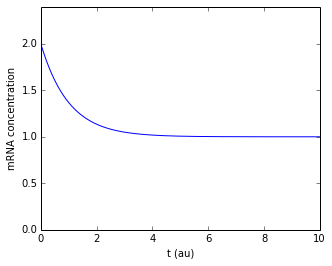

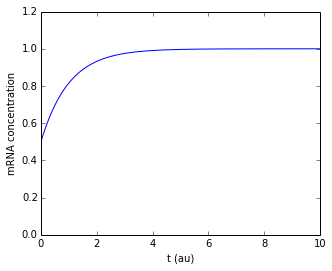

In [54]:
run()
run(X0 = 0.5)

Smaller $\alpha$

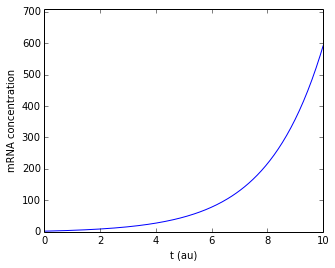

In [55]:
run(alpha = 0.5, tf=10.)

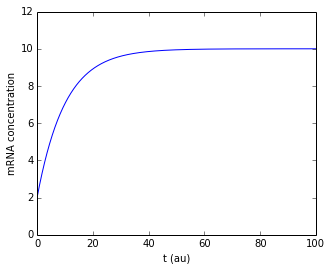

In [56]:
run(alpha = 1.1, tf=100.)

Critical case


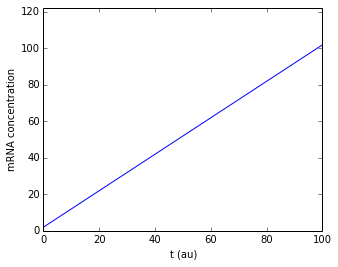

In [57]:
print 'Critical case'
run(alpha = 1., tf=100.)

By analysing the fixed point of the system, i.e., solutions of 
$$\frac{dX^{\ast}}{dt}=0,$$
we find that
$$X^{\ast} = \frac{\beta_1}{\alpha - \beta_2}$$
whenever $\beta_2 \neq \alpha$. If $\beta_2 = \alpha$, $X^{\ast}=\beta_1$. However, the above phenomenon can be actually explained when we study the stability of these fixed points:
$$\frac{dX^{2}}{dt^2}=(\beta_2-\alpha),$$
which means we only have stable solutions when $\beta_2>\alpha$. As we can see above, when we tested $\alpha>\beta_2$, $X$ grows undefinitely. This closes everything we really need to know about this system. If you are interested in a small challenge, you can try solving this system analytically.

<br /><br />

Below, let's create a simple function to test our system from several initial conditions at once.

In [59]:
def run_ICs(ICs = [0., 1.0, 2.0], beta1 = 1., beta2 = 1., alpha = 2.0, tf = 10, X0 = 2.):
    
    # Setting everything up
    np1 = 20
    t  = np.linspace(0, tf, tf*np1)
    
    # Preparing the plot
    pl.figure( figsize=(5,4), dpi=300 )
    
    # For each initial condition in IC we have to simulate our system
    # again and plot its result
    for X0 in ICs:
        soln = odeint(f, X0, t, rtol=1e-9, atol=1e-9, args = ([beta1, beta2, alpha],))
        pl.plot(t, soln[:], 'b-')
    
    # Finishing plot details
    pl.ylabel('mRNA concentration')
    pl.xlabel('t (au)')
    pl.ylim(0,soln.max()*1.1)
    
    pl.show()
    
    return

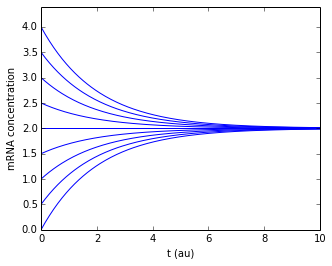

In [60]:
run_ICs(ICs = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0], alpha = 1.5)

Each of the above curves represent a different initial condition. It is usually a good idea to make a similar plot to understand how your dynamical system really behaves, and make sure that nothing unexpected is happening for at least a reasonable range of initial conditions. Notice that this last function is more general than run(), since you can simply choose one IC and basically get the same result.

## A bit more complicated

Let's solve a slightly different model:
$$\frac{dX}{dt} = \beta_1 + \beta_2 \frac{X^n}{K^n + X^n} - \alpha X . $$
In this case, the regulation is considered more realistic .

In [61]:
def f(X,t, param):
    
    # Getting parameters
    beta1  = param[0]
    beta2  = param[1]
    alpha  = param[2]
    n      = param[3]
    K      = param[4]
    
    # Calculating the derivative
    dXdt = beta1 + beta2*X**n/(K**n + X**n) - alpha*X
    
    return dXdt

In [71]:
def run(beta1 = 1., K = 1., n = 2., beta2 = 1., alpha = 2.0, tf = 10, ICs = [2.]):
    
    # Simulating
    np1 = 20
    t  = np.linspace(0, tf, tf*np1)
    
    # Plotting the results
    pl.figure( figsize=(5,4), dpi=300 )
    
    # Solving our system for each initial condition
    for X0 in ICs:
        soln = odeint(f, X0, t, rtol=1e-9, atol=1e-9, args = ([beta1, beta2, alpha, n, K],))
        pl.plot(t, soln[:], 'b-')
    
    # Finishing plot details
    pl.ylabel('mRNA concentration')
    pl.xlabel('t (au)')
    pl.show()
    
    return

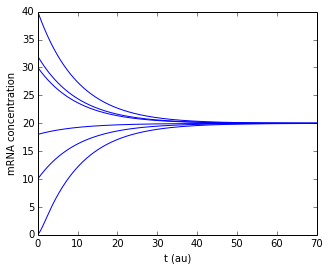

In [81]:
run(alpha=.1, tf=70., ICs = [0., 10., 18., 32., 30., 40.0])

## What about the self-inhibition? -- Challange 1

We have switched the positive auto-regulation $\beta_2 X $ with $\beta_2  X^n / \left( K^n + X^n \right)$ to render a more realistic transfer function. However, the inhibition $- \alpha X$ remains linear. Why don't you change our code above and make this inhibition more realistic? Check the inhibitory analogous of the realistic positive auto-regulation  in our [Python Intro](http://nbviewer.ipython.org/github/thmosqueiro/modeligem/blob/master/notebooks/Python_Intro.ipynb)!

<br />
<br />

# Repressilator - Modeling and predicting behavior of a synthetic oscillator

We now turn to a model much more interesting model: three repressing genes.

<img src="Repressilator_Circuit.png" style:"height: 10px;" />

This model was first studied by Elowitz & Leibler (Nature 403:6767, 2000). This dynamical system presents non-linearities that creates an exciting phenomenon: oscillations in the concentration of the three proteins. Elowitz & Leibler published both this model and an experiment where gfp was promoted by one of these proteins and, in turn, fluorescence was shown to be oscillating. Recently, it became almost a text-book case of study.

** to be completed!! **

## Defining the dynamical system

In [56]:
def shill(p, alpha, n, KM):
    """Specialized Hill Function"""
    return alpha/( 1 + (p/1)**n )

def f(X,t, param):
    m_lacl = X[0]
    p_cl   = X[1]
    m_tetR = X[2]
    p_lacl = X[3]
    m_cl   = X[4]
    p_tetR = X[5]
    
    # Getting parameters
    alpha  = param[0]
    alpha0 = param[1]
    beta   = param[2]
    n      = param[3]
    KM     = param[4]
    
    dm_lacl  = -m_lacl + shill(p_cl, alpha, n, KM)   + alpha0
    dm_tetR  = -m_tetR + shill(p_lacl, alpha, n, KM) + alpha0
    dm_cl    = -m_cl   + shill(p_tetR, alpha, n, KM) + alpha0
    
    dp_cl    = -beta*( p_cl   - m_cl )
    dp_lacl  = -beta*( p_lacl - m_lacl )
    dp_tetR  = -beta*( p_tetR - m_tetR )
    
    derivatives = [dm_lacl, dp_cl, dm_tetR, dp_lacl, dm_cl, dp_tetR]
    
    return derivatives

## Simulating the dynamical system

In [65]:
def run(beta = 200., alpha = 10, alpha0 = 1., n = 2.0, tf = 50, X0 = [2., 0., 5., 0., 10., 0.], KM=40):
    
    # Simulating
    np1 = 100
    t  = np.linspace(0, tf, tf*np1)
    soln = odeint(f, X0, t, rtol=1e-9, atol=1e-9, args = ([alpha, alpha0, beta, n, KM],))
    
    
    # Plotting the results
    pl.figure( figsize=(12,5), dpi=300 )
    
    # First the mRNA concentrations
    pl.subplot(121)
    pl.plot(t, soln[:,0])
    pl.plot(t, soln[:,2])
    pl.plot(t, soln[:,4])
    pl.ylabel('mRNA concentration')
    pl.xlabel('t (au)')
    
    # Then the protein concentrations
    pl.subplot(122)
    pl.plot(t, soln[:,1])
    pl.plot(t, soln[:,3])
    pl.plot(t, soln[:,5])
    pl.ylabel('Protein concentration')
    pl.xlabel('t (au)')
    
    
    pl.show()
    
    return t, soln

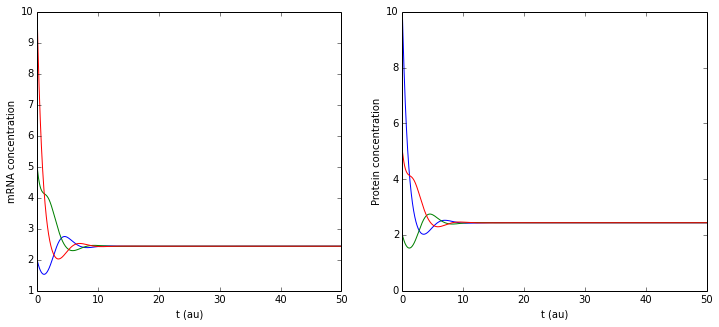

In [63]:
run();

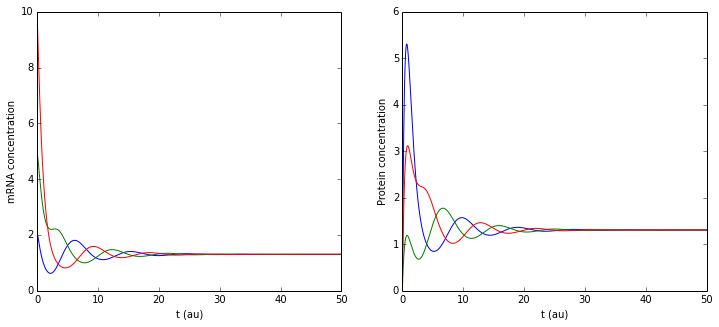

In [84]:
run(beta = 2., alpha = 3., alpha0 = 0.2, n = 2.0);

It is almost oscillating. Using the Phase Portrait in Elowits & Leibler paper, we can set the parameters into a state where the system keeps oscillating. 

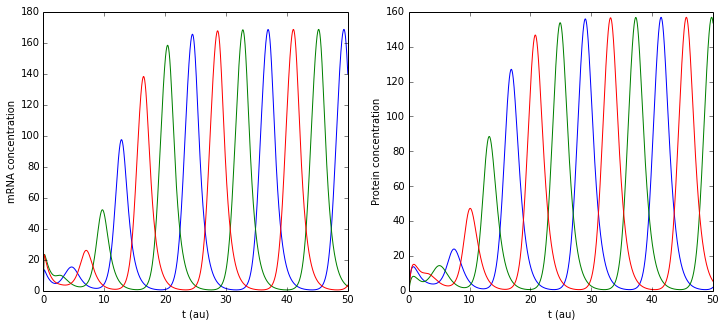

In [73]:
run(beta = 2., alpha = 300, alpha0 = 0.2, n = 2.0);

Exactly as we did with the last dynamical system, we can study the stability of the steady states in this system. **(to be done asap!)**

<br />

Studying the phase space

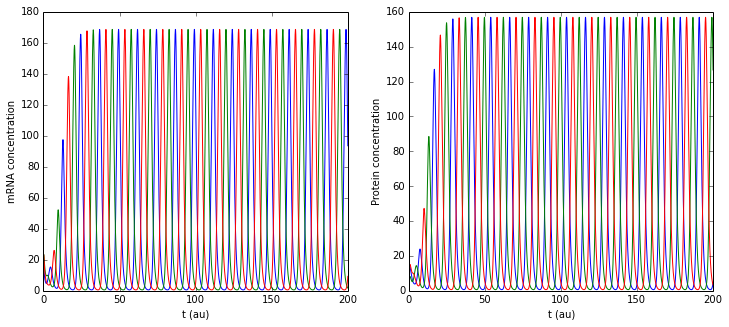

Number of points:  (20000,)


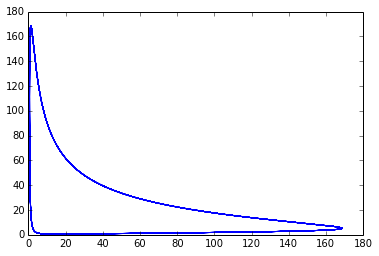

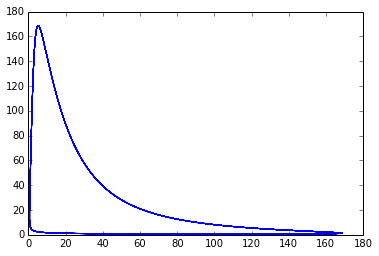

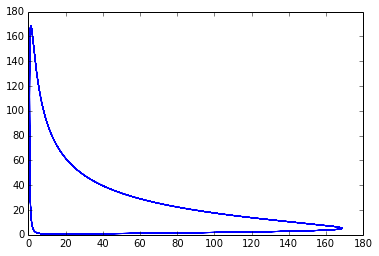

In [81]:
t, sol1 = run(beta = 2., alpha = 300, alpha0 = 0.2, n = 2.0, tf = 200.)

print 'Number of points: ', t.shape

pl.plot(sol1[5000:,0], sol1[5000:,2])
pl.show()
pl.plot(sol1[5000:,0], sol1[5000:,4])
pl.show()
pl.plot(sol1[5000:,2], sol1[5000:,4])
pl.show()

## Want to try your skills?  -- Challange 2

If you are done with this notebook, we have a **challange** for you. We have not included the production of gfp in our model, which is one of the most used markers. Usually, transcription of gfp gene will induce fluorescence and can be used to measure the level of other genes' transcription. The challange is for you to include one additional equation in the code above and predict the concentration of gfp mRNA.